In [1]:
import scipy.stats as st
from typing import Tuple, List
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# ###############
# ###############
# Q1
# ###############
# ###############

# Download and read the data.


def read_data(filename: str) -> pd.DataFrame:
    """Read data and return dataframe

    Args:
        filename (str): name of the file

    Returns:
        pd.DataFrame: dataframe read from the file
    """
    return pd.read_csv(filename)

In [2]:
# Prepare your input data and labels


def prepare_data(df_train: pd.DataFrame, df_test: pd.DataFrame) -> tuple:
    """Seperate input data and labels, remove NaN values from both dataframes.

    Args:
        df_train (pd.DataFrame): train dataframe
        df_test (pd.DataFrame): test dataframe

    Returns:
        tuple: train_data, train_label, test_data, test_label
    """
    df_train = df_train.dropna()
    df_test = df_test.dropna()

    train_data = df_train['x']
    train_label = df_train['y']
    test_data = df_test['x']
    test_label = df_test['y']
    return np.array(train_data).reshape(-1, 1), np.array(train_label).reshape(-1, 1), np.array(test_data).reshape(-1, 1), np.array(test_label).reshape(-1, 1)

Implement LinearRegression class


class LinearRegression_Local:
    def __init__(self, learning_rate=0.00001, iterations=30):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function for model training
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        # n is the number of features
        self.m, self.n = (self.X).shape
        # weight initialization
        self.W = np.zeros(self.n)  # initialize weight with 0s
        self.b = 0

        # loop number of iterations given by init
        for i in range(self.iterations):
            # update the weights using function
            self.update_weights()
        return self

    # Helper function to update weights in gradient descent

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = - (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - 2 * np.sum(self.Y - Y_pred) / self.m

        # update weights

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self

    # Hypothetical function  h( x )
    def predict(self, X):
        return X.dot(self.W) + self.b

In [3]:
# Build your model


def build_model(train_X: np.array, train_y: np.array):
    """Train a linear regression moddel

    Args:
        train_X (np.array): test data set
        train_y (np.array): test label set

    Returns:
        LinearRegression: a fit linear regression model
    """
    model = LinearRegression()
    model.fit(train_X, train_y)
    return model

In [4]:


def pred_func(model: LinearRegression, X_test: np.array) -> np.array:
    """return numpy array comprising of prediction on test set using the model

    Args:
        model (LinearRegression): model to predict with 
        X_test (np.array): data to test on

    Returns:
        np.array: reshaped array
    """
    x = np.array(model.predict(X_test))
    return x.reshape(-1, 1)

In [5]:
# Calculate and print the mean square error of your prediction


def MSE(y_test: np.array, pred: np.array) -> np.array:
    """return the mean square error corresponding to your prediction

    Args:
        y_test (_type_): _description_
        pred (_type_): _description_

    Returns:
        _type_: _description_
    """
    '''
        return the mean square error corresponding to your prediction
    '''

    return np.square(np.subtract(y_test, pred)).mean()

###############
###############
Q2
###############
###############

In [6]:


def read_training_data(filename: str) -> tuple:
    '''
        read train data into a dataframe df1, store the top 10 entries of the dataframe in df2
        and return a tuple of the form (df1, df2, shape of df1)   
    '''

    df1 = pd.read_csv(filename)
    df2 = df1.iloc[:10]
    return df1, df2, df1.shape

In [7]:
# Prepare your input data and labels


def data_clean(df_train: pd.DataFrame) -> tuple:
    '''
        check for any missing values in the data and store the missing values in series s, drop the entries corresponding 
        to the missing values and store dataframe in df_train and return a tuple in the form: (s, df_train)
    '''
    s = (df_train.isnull().values.any()).squeeze()
    df_train = df_train.dropna()
    return s, df_train

In [8]:


def feature_extract(df_train: pd.DataFrame) -> tuple:
    '''
        New League is the label column.
        Separate the data from labels.
        return a tuple of the form: (features(dtype: pandas.core.frame.DataFrame), label(dtype: pandas.core.series.Series))
    '''
    return df_train.drop(['NewLeague'], axis=1),  pd.Series(df_train['NewLeague'])

In [9]:


def data_preprocess(feature: pd.DataFrame) -> pd.DataFrame:
    '''
        Separate numerical columns from nonnumerical columns. (In pandas, check out .select dtypes(exclude = ['int64', 'float64']) and .select dtypes(
        include = ['int64', 'float64']). Afterwards, use get dummies for transforming to categorical. Then concat both parts (pd.concat()).
        and return the concatenated dataframe.
    '''
    df_numerical = feature.select_dtypes(include=['int64', 'float64'])
    df_categorical = feature.select_dtypes(exclude=['int64', 'float64'])
    df_categorical = pd.get_dummies(df_categorical)

    return pd.concat([df_categorical, df_numerical], axis=1)

In [10]:


def label_transform(labels: pd.Series) -> pd.Series:
    '''
        Transform the labels into numerical format and return the labels
    '''
    labels = labels.replace('A', 0)
    labels = labels.replace('N', 1)
    return labels

###############
###############
Q3
###############
###############

In [11]:


def data_split(features: pd.DataFrame, label: pd.Series, random_state=42) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    '''
        Split 80% of data as a training set and the remaining 20% of the data as testing set using the given random state
        return training and testing sets in the following order: X_train, X_test, y_train, y_test
    '''
    return train_test_split(features, label, test_size=0.2, random_state=random_state)

In [12]:


def train_linear_regression(x_train: np.ndarray, y_train: np.ndarray):
    '''
        Instantiate an object of LinearRegression class, train the model object
        using training data and return the model object
    '''
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

In [13]:


def train_logistic_regression(x_train: np.ndarray, y_train: np.ndarray, max_iter=1000000):
    '''
        Instantiate an object of LogisticRegression class, train the model object
        use provided max_iterations for training logistic model
        using training data and return the model object
    '''
    model = LogisticRegression(max_iter=max_iter)
    model.fit(x_train, y_train)
    return model

In [14]:


def models_coefficients(linear_model, logistic_model) -> Tuple[np.ndarray, np.ndarray]:
    '''
        return the tuple consisting the coefficients for each feature for Linear Regression 
        and Logistic Regression Models respectively
    '''
    return linear_model.coef_, logistic_model.coef_

In [15]:
def linear_pred_and_area_under_curve(linear_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of Linear Regression 
        and Logistic Regression Models respectively in the following order 
        [linear_reg_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    pred = linear_model.predict(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred) 
    return  pred, fpr, tpr, thresholds, roc_auc_score(y_test, pred) 

In [16]:
def logistic_pred_and_area_under_curve(logistic_model: LogisticRegression, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of Linear Regression 
        and Logistic Regression Models respectively in the following order 
        [log_reg_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    pred = logistic_model.predict(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred) 
    return  pred, fpr, tpr, thresholds, roc_auc_score(y_test, pred) 

In [17]:
def optimal_thresholds(linear_threshold: np.ndarray, linear_reg_fpr: np.ndarray, linear_reg_tpr: np.ndarray, log_threshold: np.ndarray, log_reg_fpr: np.ndarray, log_reg_tpr: np.ndarray) -> Tuple[float, float]:
    '''
        return the tuple consisting the thresholds of Linear Regression and Logistic Regression Models respectively
    '''
    max_lin = np.argmax(linear_reg_tpr - linear_reg_fpr)
    max_log = np.argmax(log_reg_tpr - log_reg_fpr)
    return linear_threshold, log_threshold

In [18]:

def stratified_k_fold_cross_validation(num_of_folds: int, shuffle: True, features: pd.DataFrame, label: pd.Series):
    '''
        split the data into 5 groups. Checkout StratifiedKFold in scikit-learn
    '''
    strat = StratifiedKFold(n_splits=5, shuffle=shuffle)
    return strat.get_n_splits(features, label)

In [19]:
def train_test_folds(skf, num_of_folds: int, features: pd.DataFrame, label: pd.Series) -> Tuple[np.ndarray, np.ndarray, np.ndarray, dict]:
    '''
        train and test in for loop with different training and test sets obatined from skf. 
        use a PENALTY of 12 for logitic regression model for training
        find features in each fold and store them in features_count array.
        populate auc_log and auc_linear arrays with roc_auc_score of each set trained on logistic regression and linear regression models respectively.
        populate f1_dict['log_reg'] and f1_dict['linear_reg'] arrays with f1_score of trained logistic and linear regression models on each set
        return features_count, auc_log, auc_linear, f1_dict dictionary
    '''
    pass


def is_features_count_changed(features_count: np.array) -> bool:
    '''
        compare number of features in each fold (features_count array's each element)
        return true if features count doesn't change in each fold. else return false
    '''
    for i in range(len(features_count) - 1):
        if features_count[i] != features_count[i - 1]:
            return False
    return True


def mean_confidence_interval(data: np.array, confidence=0.95) -> Tuple[float, float, float]:
    '''
        To calculate mean and confidence interval, in scipy checkout .sem to find standard error of the mean of given data (AUROCs/ f1 scores of each model, linear and logistic trained on all sets). 
        Then compute Percent Point Function available in scipy and mutiply it with standard error calculated earlier to calculate h. 
        The required interval is from mean-h to mean+h
        return the tuple consisting of mean, mean -h, mean+h
    '''
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence) / 2, n - 1)
    return m, m - h, m + h

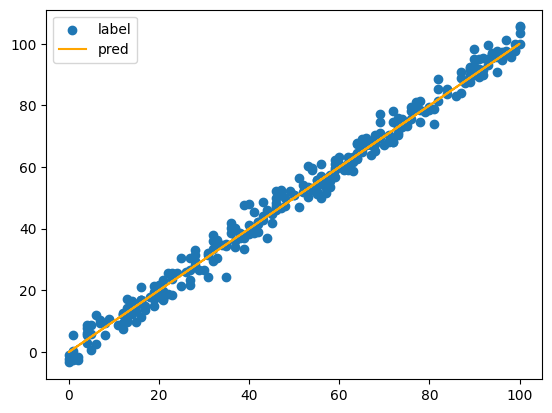

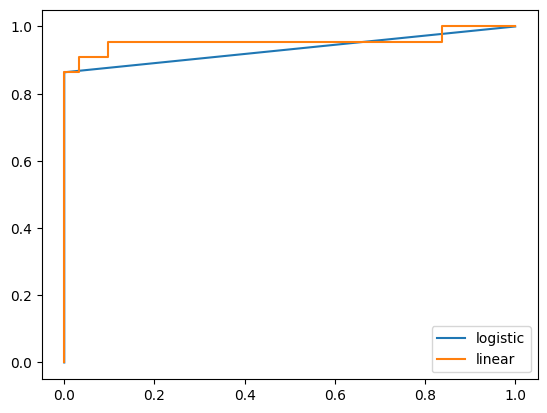

TypeError: stratified_k_fold_cross_validation() missing 1 required positional argument: 'label'

In [20]:
if __name__ == "__main__":

    ################
    ################
    # Q1
    ################
    ################
    data_path_train = "./path/train.csv"
    data_path_test = "./path/test.csv"
    df_train, df_test = read_data(data_path_train), read_data(data_path_test)

    train_X, train_y, test_X, test_y = prepare_data(df_train, df_test)
    model = build_model(train_X, train_y)

    # Make prediction with test set
    preds = pred_func(model, test_X)

    # Calculate and print the mean square error of your prediction
    mean_square_error = MSE(test_y, preds)

    # plot your prediction and labels, you can save the plot and add in the report

    plt.scatter(test_X, test_y, label='label')
    plt.plot(test_X, preds, label='pred', color="orange")
    plt.legend()
    plt.show()

    ################
    ################
    # Q2
    ################
    ################

    data_path_training = "./path/Hitters.csv"

    train_df, df2, df_train_shape = read_training_data(data_path_training)
    s, df_train_mod = data_clean(train_df)
    features, label = feature_extract(df_train_mod)
    final_features = data_preprocess(features)
    final_label = label_transform(label)

    ################
    ################
    # Q3
    ################
    ################

    num_of_folds = 5
    max_iter = 100000008
    X = final_features
    y = final_features
    auc_log = []
    auc_linear = []
    features_count = []
    f1_dict = {'log_reg': [], 'linear_reg': []}
    is_features_count_changed = True

    X_train, X_test, y_train, y_test = data_split(final_features, final_label)

    linear_model = train_linear_regression(X_train, y_train)

    logistic_model = train_logistic_regression(X_train, y_train)

    linear_coef, logistic_coef = models_coefficients(
        linear_model, logistic_model)

    linear_y_pred, linear_reg_fpr, linear_reg_tpr, linear_reg_area_under_curve, linear_threshold = linear_pred_and_area_under_curve(
        linear_model, X_test, y_test)

    log_y_pred, log_reg_fpr, log_reg_tpr, log_reg_area_under_curve, log_threshold = logistic_pred_and_area_under_curve(
        logistic_model, X_test, y_test)

    plt.plot(log_reg_fpr, log_reg_tpr, label='logistic')
    plt.plot(linear_reg_fpr, linear_reg_tpr, label='linear')
    plt.legend()
    plt.show()

    linear_optimal_threshold, log_optimal_threshold = optimal_thresholds(
        linear_threshold, linear_reg_fpr, linear_reg_tpr, log_threshold, log_reg_fpr, log_reg_tpr)

    skf = stratified_k_fold_cross_validation(
        num_of_folds, final_features, final_label)
    features_count, auc_log, auc_linear, f1_dict = train_test_folds(
        skf, num_of_folds, final_features, final_label)

    print("Does features change in each fold?")

    # call is_features_count_changed function and return true if features count changes in each fold. else return false
    is_features_count_changed = is_features_count_changed(features_count)

    print(is_features_count_changed)

    auc_linear_mean, auc_linear_open_interval, auc_linear_close_interval = 0, 0, 0
    auc_log_mean, auc_log_open_interval, auc_log_close_interval = 0, 0, 0

    f1_linear_mean, f1_linear_open_interval, f1_linear_close_interval = 0, 0, 0
    f1_log_mean, f1_log_open_interval, f1_log_close_interval = 0, 0, 0

    # Find mean and 95% confidence interval for the AUROCs for each model and populate the above variables accordingly
    # Hint: use mean_confidence_interval function and pass roc_auc_scores of each fold for both models (ex: auc_log)
    # Find mean and 95% confidence interval for the f1 score for each model.

    auc_linear_mean, auc_linear_open_interval, auc_linear_close_interval = assignment2.mean_confidence_interval(
        auc_linear)
    auc_log_mean, auc_log_open_interval, auc_log_close_interval = assignment2.mean_confidence_interval(
        auc_log)

    f1_linear_mean, f1_linear_open_interval, f1_linear_close_intervel = assignment2.mean_confidence_interval(
        f1_dict['linear_reg'])
    f1_log_mean, f1_log_open_interval, f1_log_close_interval = assignment2.mean_confidence_interval(
        f1_dict['log_reg'])

In [25]:
linear_reg_area_under_curve

array([ 1.95467986,  0.95467986,  0.75203158,  0.14189673,  0.11195391,
        0.09690581,  0.09179067, -0.00375475, -0.00797154, -0.18302528])

In [24]:
linear_optimal_threshold

0.9560117302052785